# 特征选择

In [1]:
#定义熵函数
def calEnt(dataset):
    n=dataset.shape[0]
    i=dataset.iloc[:,-1].value_counts()
    p=i/n
    ent=(-p*np.log2(p)).sum()
    return ent

In [2]:
import numpy as np
import pandas as pd

In [3]:
row_data = {'accompany':[0,0,0,1,1],
             'game':[1,1,0,1,1],
             'bad boy':['yes','yes','no','no','no']}
data = pd.DataFrame(row_data)
data

,accompany,game,bad boy
0,0,1,yes
1,0,1,yes
2,0,0,no
3,1,1,no
4,1,1,no


In [4]:
calEnt(data)

0.9709505944546686

In [5]:
a=(3/5)*(-(2/3)*np.log2(2/3)-(1/3)*np.log2(1/3))
calEnt(data)-a

0.4199730940219749

In [6]:
b=4/5*(-2/4*np.log2(2/4)-2/4*np.log2(2/4))
calEnt(data)-b

0.17095059445466854

In [7]:
# 选择最优的列进行切分
def bestSplit(dataSet):
    baseEnt = calEnt(dataSet)                                # 计算原始熵
    bestGain = 0                                             # 初始化信息增益
    axis = -1                                                # 初始化最佳切分列，标签列
    for i in range(dataSet.shape[1]-1):                      # 对特征的每一列进行循环
        levels= dataSet.iloc[:,i].value_counts().index       # 提取出当前列的所有取值
        ents = 0                                             # 初始化子节点的信息熵
        for j in levels:                                     # 对当前列的每一个取值进行循环
            childSet = dataSet[dataSet.iloc[:,i]==j]         # 某一个子节点的dataframe
            ent = calEnt(childSet)                           # 计算某一个子节点的信息熵
            ents += (childSet.shape[0]/dataSet.shape[0])*ent # 计算当前列的信息熵
            print(f'第{i}列的信息熵为{ents}')
        infoGain = baseEnt-ents                              # 计算当前列的信息增益
        print(f'第{i}列的信息增益为{infoGain}')
        if (infoGain > bestGain):
            bestGain = infoGain                              # 选择最大信息增益
            axis = i                                         # 最大信息增益所在列的索引
    return axis

In [8]:
bestSplit(data)

第0列的信息熵为0.5509775004326937
第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列的信息熵为0.8
第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854


0

In [9]:
col=data.columns[0]
col

'accompany'

In [10]:
data.loc[data["accompany"]==1,:].drop("accompany",axis=1)

,game,bad boy
3,1,no
4,1,no


In [11]:
def mySplit(dataSet,axis,value):
    col=dataSet.columns[axis]
    redataset=dataSet.loc[dataSet[col]==value,:].drop(col,axis=1)
    return redataset

In [12]:
mySplit(data,0,1)

,game,bad boy
3,1,no
4,1,no


# 决策树的生成

In [13]:
def createTree(dataSet):
    featlist = list(dataSet.columns)                        # 提取出数据集所有的列
    classlist = dataSet.iloc[:,-1].value_counts()           # 获取最后一列类标签
    # 判断最多标签数目是否等于数据集行数，或者数据集是否只有一列
    if classlist[0]==dataSet.shape[0] or dataSet.shape[1] == 1:
        return classlist.index[0]                           # 如果是，返回类标签
    axis = bestSplit(dataSet)                               # 确定出当前最佳切分列的索引
    bestfeat = featlist[axis]                               # 获取该索引对应的特征
    myTree = {bestfeat:{}}                                  # 采用字典嵌套的方式存储树信息
    del featlist[axis]                                      # 删除当前特征
    valuelist = set(dataSet.iloc[:,axis])                   # 提取最佳切分列所有属性值
    for value in valuelist:                                 # 对每一个属性值递归建树
        myTree[bestfeat][value] = createTree(mySplit(dataSet,axis,value))
    return myTree

In [14]:
mytree=createTree(data)

第0列的信息熵为0.5509775004326937
第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列的信息熵为0.8
第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854
第0列的信息熵为0.0
第0列的信息熵为0.0
第0列的信息增益为0.9182958340544896


In [15]:
mytree

{'accompany': {0: {'game': {0: 'no', 1: 'yes'}}, 1: 'no'}}

# sklearn实现

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [17]:
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [19]:
wine.data.shape

(178, 13)

In [20]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [21]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.2,random_state=420)

In [22]:
Xtrain.shape

(142, 13)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf=DecisionTreeClassifier(random_state=30,splitter="random")
clf=clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9444444444444444

In [25]:
import matplotlib.pyplot as plt

In [26]:
plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

In [27]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

In [31]:
import graphviz

In [32]:
from sklearn import tree

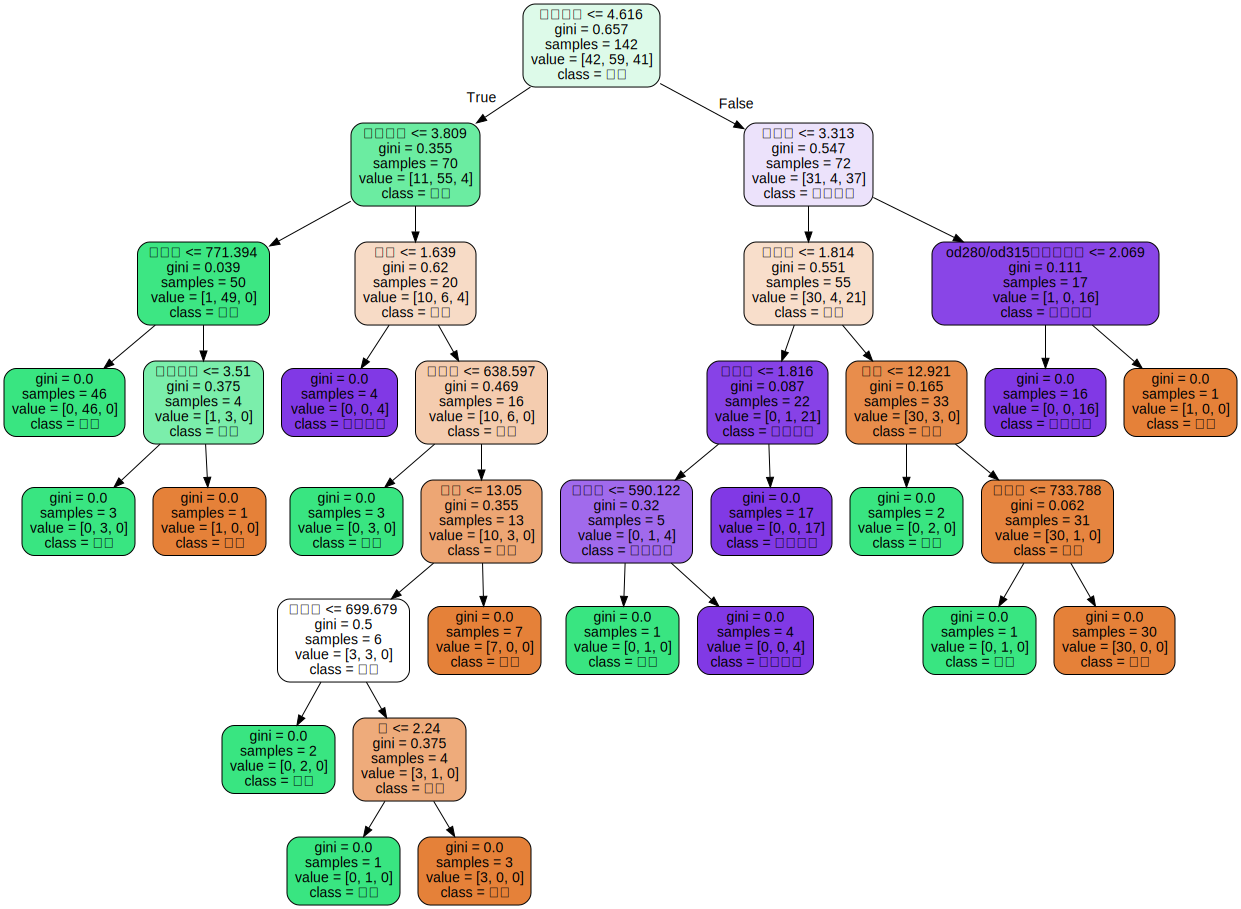

In [42]:
dot_data=tree.export_graphviz(clf,feature_names=feature_name,class_names=["琴酒","雪莉","贝尔摩德"],filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

In [35]:
#特征重要性
clf.feature_importances_

array([0.        , 0.01930805, 0.        , 0.0209426 , 0.        ,
       0.        , 0.40393716, 0.        , 0.        , 0.39576989,
       0.        , 0.        , 0.1600423 ])

In [36]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.019308052575917816),
 ('灰', 0.0),
 ('灰的碱性', 0.020942596709328833),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4039371631388027),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.395769885113343),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.16004230246260764)]

In [37]:
#节点个数
clf.tree_.node_count

13

In [38]:
clf.tree_.feature

array([ 9, 12, -2, -2,  6,  3, -2, -2, 12,  1, -2, -2, -2], dtype=int64)

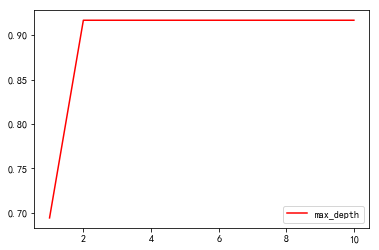

In [46]:
score=[]
for i in range(10):
    clf=DecisionTreeClassifier(max_depth=i+1,criterion="gini",random_state=50)
    clf=clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest, Ytest))
plt.plot(range(1,11),score,color="red",label="max_depth")
plt.legend()
plt.show()

# 样本不平衡问题

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

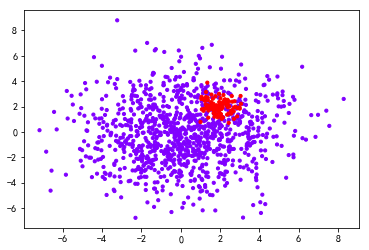

In [48]:
class_1 = 1000 #类别1有1000个样本
class_2 = 100 #类别2只有100个
centers = [[0,0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [2.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=420,shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10);
#其中红色点是少数类，紫色点是多数类



In [49]:
# 划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=420)

In [50]:
#不设定class_weight
clf = DecisionTreeClassifier()
clf.fit(Xtrain, Ytrain)
clf.predict(Xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
#设定class_weight
wclf = DecisionTreeClassifier(class_weight='balanced')
wclf.fit(Xtrain, Ytrain)
wclf.predict(Xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
#给两个模型分别打分看看，这个分数是accuracy准确度
clf.score(Xtest,Ytest)

0.8954545454545455

In [53]:
wclf.score(Xtest,Ytest)

0.9045454545454545

# 混淆矩阵

In [59]:
#precision

In [64]:
p1=(Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(clf.predict(Xtest) == 1).sum()

In [66]:
p2=(Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(wclf.predict(Xtest) == 1).sum()

In [58]:
#recall

In [67]:
r1=(Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()

In [68]:
r2=(Ytest[Ytest == wclf.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()

In [62]:
#F measure

In [69]:
f1=2*p1*r1/(p1+r1)
f1

0.5490196078431373

In [71]:
f2=2*p2*r2/(p2+r2)
f2

0.5613207547169811

In [72]:
#混淆矩阵库

In [73]:
from sklearn import metrics

In [74]:
ypred=wclf.predict(Xtest)

In [75]:
#accuracy
metrics.accuracy_score(Ytest,ypred)

0.9045454545454545

In [76]:
#precision
metrics.precision_score(Ytest,ypred)

0.6538461538461539

In [77]:
#recall
metrics.recall_score(Ytest,ypred)

0.5862068965517241

In [78]:
#F1
metrics.f1_score(Ytest,ypred)

0.6181818181818182

# 网络搜索

In [87]:
# 划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=420)

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
#设置参数可取值
parm_grid={"criterion":["entropy","gini"],"max_depth":range(2,11),"min_samples_split":range(2,20,2),"min_samples_leaf":range(1,10)}
#设置参数网格
reg=GridSearchCV(DecisionTreeClassifier(),parm_grid,cv=5)
#建模
reg.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 11), 'min_samples_split': range(2, 20, 2), 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
#最优参数
reg.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [91]:
reg.best_score_

0.9534090909090909

In [92]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_split=6,min_samples_leaf=5)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9318181818181818